#Snippets and Programs from Chapter 7: Solving Calculus Problems

In [1]:
#P182: Simple example of finding the limit
>>> from sympy import Limit, Symbol, S 
>>> x = Symbol('x')
>>> Limit(1/x, x, S.Infinity).doit()

0

In [2]:
#P182: Specifying the limit direction: negative
>>> from sympy import Limit
>>> Limit(1/x, x, 0, dir='-').doit()

-oo

In [3]:
#P182: Specifying the limit direction: positive
>>> from sympy import Limit
>>> Limit(1/x, x, 0, dir='+').doit()

oo

In [4]:
#P183: Indeterminate limit example
>>> from sympy import Symbol, sin 
>>> Limit(sin(x)/x, x, 0).doit()

1

In [5]:
#P183: Continuous Compound Interest
>>> from sympy import Symbol, Limit, S
>>> n = Symbol('n')
>>> p = Symbol('p', positive=True)
>>> r = Symbol('r', positive=True)
>>> t = Symbol('t', positive=True)
>>> Limit(p*(1+r/n)**(n*t), n, S.Infinity).doit()

p*exp(r*t)

In [6]:
#P184: Instantaneous Rate of Change
>>> from sympy import Symbol, Limit
>>> t = Symbol('t') 
>>> St = 5*t**2 + 2*t + 8
>>> t1 = Symbol('t1')
>>> delta_t = Symbol('delta_t')
>>> St1 = St.subs({t: t1})
>>> St1_delta = St.subs({t: t1 + delta_t})
>>> Limit((St1_delta-St1)/delta_t, delta_t, 0).doit()

10*t1 + 2

In [7]:
#P185: Finding the derivative
>>> from sympy import Symbol, Derivative 
>>> t = Symbol('t')
>>> St = 5*t**2 + 2*t + 8
>>> d = Derivative(St, t)
>>> d.doit().subs({t:t1})

10*t1 + 2

In [8]:
#P186: Derivative of a complicated arbitrary function
>>> from sympy import Derivative, Symbol 
>>> x = Symbol('x')
>>> f = (x**3 + x**2 + x)*(x**2+x)
>>> Derivative(f, x).doit()

(2*x + 1)*(x**3 + x**2 + x) + (x**2 + x)*(3*x**2 + 2*x + 1)

In [9]:
#P186: Derivative calculator
'''
Derivative Calculator
'''
from sympy import Symbol, Derivative, sympify, pprint
from sympy.core.sympify import SympifyError

def derivative(f, var):
    var = Symbol(var)
    d = Derivative(f, var).doit()
    pprint(d)

if __name__=='__main__':
    f = input('Enter a function: ')
    var = input('Enter the variable to differentiate with respect to: ')
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid input')
    else:
        derivative(f, var)

Enter a function:  2*x**2+3*x+1
Enter the variable to differentiate with respect to:  x


4⋅x + 3


In [11]:
>>> from sympy import Symbol, solve, Derivative
>>> x = Symbol('x')
>>> f = x**5 - 30*x**3 + 50*x
>>> d1 = Derivative(f, x).doit()

In [12]:
>>> critical_points = solve(d1)
>>> critical_points

[-sqrt(9 - sqrt(71)),
 sqrt(9 - sqrt(71)),
 -sqrt(sqrt(71) + 9),
 sqrt(sqrt(71) + 9)]

In [13]:
>>> A = critical_points[2]
>>> B = critical_points[0]
>>> C = critical_points[1]
>>> D = critical_points[3]

In [14]:
>>> d2 = Derivative(f, x, 2).doit()

In [16]:
>>> print(d2.subs({x:B}).evalf())
>>> print(d2.subs({x:C}).evalf())
>>> print(d2.subs({x:A}).evalf())
>>> print(d2.subs({x:D}).evalf())

127.661060789073
-127.661060789073
-703.493179468151
703.493179468151


In [10]:
#P193: Use gradient ascent to find the angle at which a projectile has a maximum range

'''
Use gradient ascent to find the angle at which the projectile
has maximum range for a fixed velocity, 25 m/s
'''
import math
from sympy import Derivative, Symbol, sin

def grad_ascent(x0, f1x, x):
    epsilon =  1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new

def find_max_theta(R, theta):
    # Calculate the first derivative
    R1theta = Derivative(R, theta).doit()
    theta0 = 1e-3
    theta_max = grad_ascent(theta0, R1theta, theta) 
    return theta_max

if __name__ == '__main__':
    g = 9.8
    # Assume initial velocity
    u = 25
    # Expression for range
    theta = Symbol('theta')
    R = u**2*sin(2*theta)/g
    theta_max = find_max_theta(R, theta)
    print('Theta: {0}'.format(math.degrees(theta_max)))
    print('Maximum Range: {0}'.format(R.subs({theta:theta_max})))

Theta: 44.997815081691805
Maximum Range: 63.7755100185965


In [17]:
%matplotlib inline

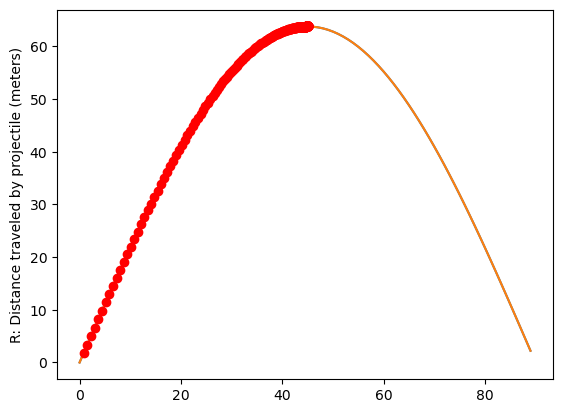

Theta: 44.997815081691805, Max. Range: 57.1394215709871


In [18]:
#P193: This is the program corresponding to Figure 7-5
'''
Find the angle at which the projectile has maximum range for
a fixed velocty, u. This also shows the intermediate points.
'''

import math
import matplotlib.pyplot as plt
from sympy import Derivative, Symbol, sin, cos, solve

def plot_range_theta(u):
    g = 9.8
    angles = range(0, 90, 1)
    R = [u**2*math.sin(math.radians(2*angle))/g for angle in angles]
    plt.plot(angles, R)
    # Use LaTex for the X-axis label
    #plt.rc('text', usetex=True)
    plt.plot(angles, R)
    #plt.xlabel(r'$\theta$ : Angle of projection (degrees)')
    plt.ylabel('R: Distance traveled by projectile (meters)')

def grad_ascent(x0, f1x):
    theta = Symbol('theta')
    epsilon =  1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({theta:x_old}).evalf()

    X = []
    while abs(x_old - x_new) > epsilon:
        X.append(x_new)
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({theta:x_old}).evalf()

    return x_new, X

def find_max_theta(R, theta):
    # Calculate the first derivative
    R1theta = Derivative(R, theta).doit()
    theta0 = 1e-3
    theta_max, X = grad_ascent(0.001, R1theta)
    return math.degrees(theta_max.evalf()), X

if __name__ == '__main__':
    g = 9.8
    # Assume initial velocity
    u = 25
    plot_range_theta(u)
    theta = Symbol('theta')
    # Expression for range
    R = u**2*sin(2*theta)/g
    theta_max, X = find_max_theta(R, theta)

    # calculate R for all theta's traversed
    Y = [u**2*math.sin(2*angle)/g for angle in X]
    X = [math.degrees(angle) for angle in X]
    plt.plot(X, Y, 'ro')
    plt.show()
    print('Theta: {0}, Max. Range: {1}'.format(theta_max, R.subs({theta:theta_max})))

In [19]:
#P195: Generic program for gradient ascent
'''
Use gradient ascent to find the maximum value of a
single variable function
'''
from sympy import Derivative, Symbol, sympify
def grad_ascent(x0, f1x, x):
    epsilon =  1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new

if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_max = grad_ascent(var0, d, var)
        print('{0}: {1}'.format(var.name, var_max))
        print('Maximum value: {0}'.format(f.subs({var:var_max})))

Enter a function in one variable:  25*25*sin(2*theta)/9.8
Enter the variable to differentiate with respect to:  theta
Enter the initial value of the variable:  0.001


theta: 0.785360029379083
Maximum value: 63.7755100185965


In [20]:
#P198: 

'''
Use gradient ascent to find the maximum value of a single-variable function. 
This also checks for the existence of a solution for the equation f'(x)=0.
'''
from sympy import Derivative, Symbol, sympify, solve
def grad_ascent(x0, f1x, x):
    # check if f1x=0 has a solution 
    if not solve(f1x):
        print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
        return 
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf() 
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new

if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ') 
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f) 
    except SympifyError:
        print('Invalid function entered') 
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit() 
        var_max = grad_ascent(var0, d, var) 
        if var_max:
            print('{0}: {1}'.format(var.name, var_max)) 
            print('Maximum value: {0}'.format(f.subs({var:var_max})))

Enter a function in one variable:  log(x)
Enter the variable to differentiate with respect to:  x
Enter the initial value of the variable:  0.1


Cannot continue, solution for 1/x=0 does not exist


In [21]:
#P200: Basic example of finding the indefinite Integral
>>> from sympy import Integral, Symbol 
>>> x = Symbol('x')
>>> k = Symbol('k')
>>> Integral(k*x, x).doit()

k*x**2/2

In [22]:
#P200: Basic example of finding the definite integral
>>> from sympy import Integral, Symbol 
>>> x = Symbol('x')
>>> k = Symbol('k')
>>> Integral(k*x, (x, 0, 2)).doit()

2*k

In [25]:
>>> from sympy import Integral, Symbol
>>> x = Symbol('x')
>>> Integral(x, (x, 2, 4)).doit()

6

In [23]:
#P203: Probability of the grade falling between  11 and 12
>>> from sympy import Symbol, exp, sqrt, pi, Integral
>>> x = Symbol('x')
>>> p = exp(-(x - 10)**2/2)/sqrt(2*pi)
>>> Integral(p, (x, 11, 12)).doit().evalf()

0.135905121983278

In [24]:
#P204: The probability density function is such that the integral between -infinity and infinity is 1
>>> from sympy import Symbol, exp, sqrt, pi, Integral, S
>>> x = Symbol('x')
>>> p = exp(-(x - 10)**2/2)/sqrt(2*pi)
>>> Integral(p, (x, S.NegativeInfinity, S.Infinity)).doit().evalf()

1.00000000000000